In [205]:
#导入所需要的算法包，数据集等
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#加载鸢尾花数据集，并获取其数值及特征
iris = datasets.load_iris()
X = iris.data
y = iris.target

#任务一
#将鸢尾花数据集安装8 : 2的比例划分成训练集与验证集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y, test_size=0.2,shuffle=True,random_state=4)

In [206]:


#设计模型、训练模型
def KNN_iris(xtrain,xtest,ytest,num,k):
    #进行距离计算，对每一个测试样本都与所有的训练样本求距离
    #将测试样本的类别划分为与之最近的样本相同的类别
    distance=tf.sqrt(tf.reduce_sum(tf.add(xtrain,tf.negative(xtest)),axis=1))
    
    #评估正确率
    accuracy=0
    
    # 初始化节点
    init = tf.global_variables_initializer()
    
    #启动会话
    #使用验证集检验模型性能
    with tf.Session() as sess:
        sess.run(init)
        for i in range(num):
            nn_index = sess.run(distance)
            predict = [0,0,0]
            #选取距离最小的k个近邻
            dis = np.argsort(nn_index)[:k]
            #采取投票的方式对类别进判断
            for n in dis:
                if y[n]==0:
                    predict[0] += 1
                elif y[n]==1:
                    predict[1] += 1
                else:
                    predict[2] += 1
                y[i] = np.argmax(predict)
            #如果实际类别与预测类别相同，则正确率+1
            if y[i] == ytest[i]:
                accuracy += 1
                acc = accuracy/num
    return acc  


In [207]:
#验证模型
#超参数k的选取
for k in range(len(Xtest)):
    acc = KNN_iris(Xtrain[0], Xtest,Ytest,len(Xtest),k)
    print(acc)

0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333


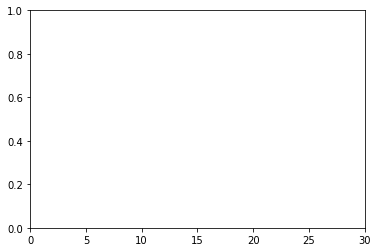

NameError: name 'pred' is not defined